# Model training notebook

### Import the important packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.decomposition import PCA
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from scikeras.wrappers import KerasRegressor

import joblib
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### Import the data

In [2]:
df_data = pd.read_csv("main_data.csv")
df_data.head()

,Cohesion,Phi,Unit_weight,Pe,Ps,FSs,FSgmp,slope_angle,slope_height
0,9.25214,27.0344,16.2721,25.7109,0.651980,2.35577,2.35758,30.0,3.0
1,12.84510,13.9206,16.3404,17.2906,0.615234,2.04328,2.04351,30.0,3.0
2,10.36260,30.1019,15.2261,89.1311,0.439082,1.79361,1.79468,30.0,3.0
3,8.00854,27.3663,14.5454,81.8012,0.598084,1.58966,1.59232,30.0,3.0
4,12.31330,40.8389,19.4886,75.3521,0.664819,2.75823,2.76120,30.0,3.0


#### Creating <b>x_data</b> and <b>y_data</b>

In [3]:
x_data_1    = df_data.iloc[:,[0,1,2,3,4,7,8]]
y_data_1    = df_data.iloc[:,[5,6]]


#### Selecting just $FS < 3$, because just in this range the predictions are important as adviced by engineers

In [4]:
x_data_1    = x_data_1[y_data_1.iloc[:,0] < 3]
y_data_1    = y_data_1[y_data_1.iloc[:,0] < 3]



#### Definition of Tensorflow ANN Pipeline

In [ ]:
# Define input as X and output as Y


# X_train, X_test, y_train, y_test = train_test_split(x_data_1,y_data_1.iloc[:,0], test_size=0.3, random_state=42)

# # Function to create keras neural network and use it in scikeras wrapper

# def create_model(optimizer = "RMSprop", drop_rate = 0.1, neurons = 10, l1 = 0.01, l2 =0.01):
#  # create model
#     model = Sequential()

#     model.add(Dense(neurons,input_dim = 7, activation="relu",kernel_regularizer = tf.keras.regularizers.L1L2(l1=l1, l2=l2)))
#     model.add(Dropout(drop_rate))
#     model.add(Dense(neurons, activation="relu"))
#     model.add(Dropout(drop_rate))
#     model.add(Dense(neurons, activation='relu'))

#     model.add(Dense(1))

#     # Compile model
#     model.compile(loss= "MSE", optimizer= optimizer, metrics=['MAPE'])
#     return model


# # fix random seed for reproducibility
# seed = 7
# tf.random.set_seed(seed)
# callback = EarlyStopping(monitor='loss', patience=5)

# # Definition of the keras wrapper model with callback for early stop
# Ann_regressor = KerasRegressor(model=create_model, verbose=0, callbacks=[callback])

# # Definition of pipeline
# Reg_pipeline = Pipeline([
#                         ("scale", StandardScaler()),
#                         ("Regressor", Ann_regressor)])

#### Using pipeline to hyperparameter optimization using <b>SearchGridCV</b>

In [ ]:
# batch_size = [20]
# epochs = [100]
# optimizer = ["RMSprop"]
# validation_split = [0.3]
# neurons = [64]
# drop_rate = [0.1]
# l1l2 = [0.02]

# # Definition of input for grid_search in dictionary format

# param_grid = dict(Regressor__batch_size=batch_size,
#                   Regressor__epochs=epochs,
#                   Regressor__optimizer = optimizer,
#                   Regressor__model__drop_rate = drop_rate,
#                   Regressor__model__neurons = neurons,
#                   Regressor__model__l1 = l1l2,
#                   Regressor__model__l2 = l1l2,
#                   Regressor__validation_split = validation_split)

# # Grid creation
# grid = GridSearchCV(estimator=Reg_pipeline, param_grid=param_grid, n_jobs=4, cv=5)


#### <b>Model.fit()<b>

In [85]:
# modelb1 = grid.fit(X_train, y_train)

#### Review the results from <b>SearchGridCV</b>

In [86]:
# pd.DataFrame(modelb1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Regressor__batch_size,param_Regressor__epochs,param_Regressor__model__drop_rate,param_Regressor__model__l1,param_Regressor__model__l2,param_Regressor__model__neurons,...,param_Regressor__validation_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,289.259847,92.7114,1.387913,0.307576,20,100,0.1,0.02,0.02,64,...,0.3,"{'Regressor__batch_size': 20, 'Regressor__epoc...",0.737631,0.88396,0.914712,0.872095,0.91678,0.865036,0.066008,1


#### Calculate $R^2$ and plot <b>y_train</b> $vs$ <b>y_pred</b>

In [ ]:
# from sklearn.metrics import r2_score
# print(r2_score(y_test,modelb1.best_estimator_.predict(X_test)))
# ax = sns.regplot(x = y_test , y = modelb1.best_estimator_.predict(X_test))
# ax.set(xlabel = r"$y_{test}$", ylabel = r"y_{pred}")

#### Save the best model from grid

In [ ]:
# joblib.dump(modelb1.best_estimator_, "Ann_model_slopes")


#### Try Xgboost model for regression with polynomial features

In [21]:
import xgboost as xgb


X_train, X_test , y_train, y_test = train_test_split(x_data_1,y_data_1.iloc[:,0], test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=42)


Reg_pipeline = Pipeline([
                        ("scale1", StandardScaler()),
                        ("scale2", PolynomialFeatures(degree=3)),
                        ("Regressor", xgb.XGBRegressor(booster="gblinear"))])


# model = Reg_pipeline.fit(X,Y["beta1"])
param_grid = {"Regressor__n_estimators":[800],
              "Regressor__reg_alpha" : [0.0],
              "Regressor__reg_lambda" : [0.03],
              "Regressor__eval_metric" : ["rmse"],
            #   "Regressor__max_depth" : [3],
              "Regressor__eta" : [0.3],
              "Regressor__seed" : [0]}

# Grid creation
grid = GridSearchCV(estimator=Reg_pipeline, param_grid=param_grid, n_jobs=5, cv=5)
# grid = RandomizedSearchCV(estimator=Reg_pipeline, param_distributions=param_grid, n_jobs=5, cv=5, n_iter=1)


#### Xgboost <b>grid.fit()</b>

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale1', StandardScaler()),
                                       ('scale2', PolynomialFeatures(degree=3)),
                                       ('Regressor',
                                        XGBRegressor(base_score=None,
                                                     booster='gblinear',
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=5,
             param_grid={'Regressor__eta': [0.3],
                         'Regressor__eval_metric': ['rmse'],
                         'Regressor__n_estimators': [800],
                         'Regressor__reg_alpha': [0.0],
                         'Regressor__reg_lambda': [0.03],
                         'Regressor__seed': [0]})

Inspect the results obtained from grid

In [24]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Regressor__eta,param_Regressor__eval_metric,param_Regressor__n_estimators,param_Regressor__reg_alpha,param_Regressor__reg_lambda,param_Regressor__seed,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,39.851381,0.123931,0.081309,0.003521,0.3,rmse,800,0.0,0.03,0,"{'Regressor__eta': 0.3, 'Regressor__eval_metri...",0.96632,0.966002,0.966877,0.965392,0.965141,0.965946,0.000627,1


### Calculate shap values to understand the sensitivity of the model to each variable

In [ ]:
X100 = shap.utils.sample(x_data_1, 100)
explainer = shap.Explainer(grid.best_estimator_.predict, X100)
shap_values = explainer(x_data_1)


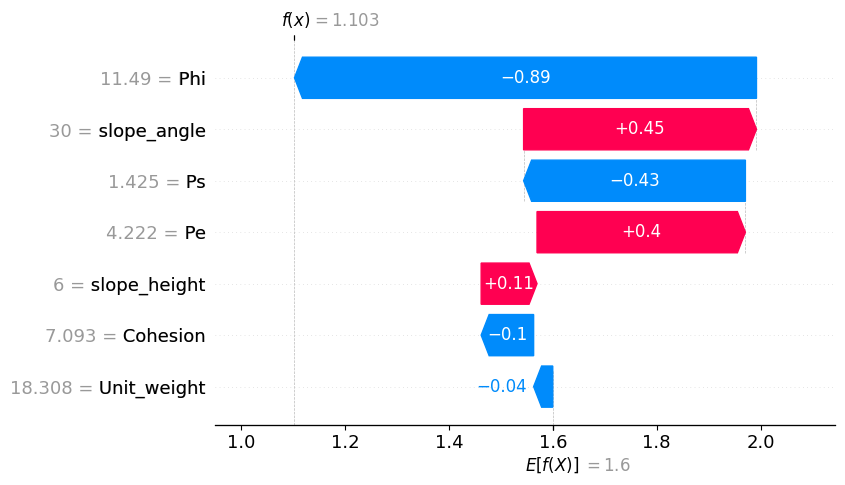

In [65]:
shap.plots.waterfall(shap_values[8800], max_display=14)


 From the waterfall plot it can be observed that $P_{s}$  and $Phi$ have an massive positive influence in the result. $Phi$ is defined as the friction angle of soils, and is a resistance parameter, so, the importance of the determination of this value have a high influence in the results and the optimization level that we can achieve. $P_{s}$ on the other side, represents the support pressure that a reinforcement have to provide to keep a slope stable. In this case, this is the controllable variable and the optimizable one too, so the accurate determination of this value have a high importance in increasing safety or stability and optimize cost.

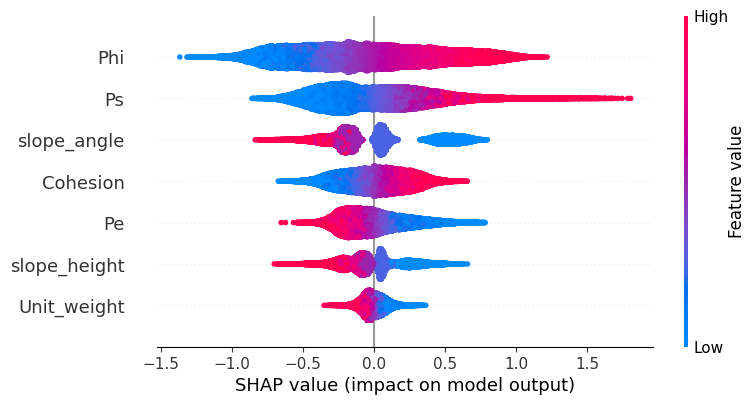

In [59]:
shap.plots.beeswarm(shap_values)


From the beeswarm plot it can be observed the same effect as in waterfall plot, $Phi$ and $P_{s}$ still the most important variables but in this case, we can observed that $Phi$ have a higher effect reducing the response (FS or factor of safety) when their value is low. $P_{s}$ shows the same behaviour but less prominent in the negative side, which means that a lower $P_{s}$ implies a lower FS.
 

Calculate the $R^2$ value between <b>y_test</b> and <b>y_pred</b>

 Rsquared value is 0.9670142522996965


[Text(0.5, 0, '$y_{test}$'), Text(0, 0.5, '$y_{pred}$')]

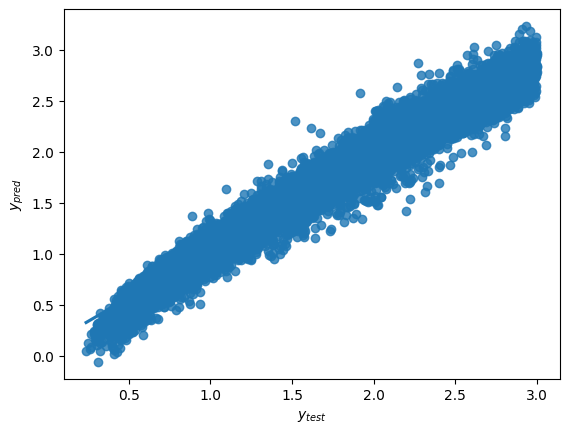

In [69]:
from sklearn.metrics import r2_score

print(" Rsquared value is " + f'{r2_score(y_test,grid.best_estimator_.predict(X_test))}')
ax = sns.regplot(x = y_test, y = grid.best_estimator_.predict(X_test) , fit_reg=True)
ax.set(xlabel = r"$y_{test}$", ylabel = r"$y_{pred}$")


#### Save the XGboost model using <b>joblib</b>

In [26]:
joblib.dump(grid.best_estimator_, "rgb_model.joblib")

['rgb_model.joblib']

In [27]:
rgb_model = joblib.load("rgb_model.joblib")
# rgb_model = joblib.load("D:/Repositories/ML-geo/artifacts/model_trainer/model_1.joblib")
# rgb_model2 = joblib.load("D:/Repositories/ML-geo/artifacts/model_trainer/model_2.joblib")



#### Test the models with a random example to inspect the difference between them

In [28]:
te_st = pd.DataFrame(np.array([[0,30,17,30,0,90,15]]), columns= list(x_data_1.columns))

# model = joblib.load("D:/Repositories/ML-geo/notebook/Ann_model_slopes")

print(rgb_model.predict(te_st))

[0.91734815]


Establishing an optimization process to calculate $P_{s}$ by establishing a $FS$ objective of 1.5

In [31]:
def obj_func(x ):

    te_st = pd.DataFrame(np.array([[0,35,17,20,x[0],75,15]]), columns= list(x_data_1.columns))
    return abs(rgb_model.predict(te_st)-1.5)

x0 = [35]
bds = [(10,50)]


from mystic.solvers import diffev2
from mystic.math import almostEqual
from mystic.monitors import VerboseMonitor
mon = VerboseMonitor(10)

result = diffev2(obj_func, x0=bds, npop=40,  gtol=30, disp=False, full_output=True, itermon=mon)

Generation 0 has ChiSquare: 0.00069248676
Generation 10 has ChiSquare: 5.4955482e-05
Generation 20 has ChiSquare: 1.1920929e-07
Generation 30 has ChiSquare: 0.0
STOP("ChangeOverGeneration with {'tolerance': 0.005, 'generations': 30}")


In [32]:
x = result[0]
te_st =  pd.DataFrame(np.array([[0,35,17,20,x[0],75,15]]), columns= list(x_data_1.columns))
rgb_model.predict(te_st)

print("The pressure needed for equilibrium is: " f'{result[0]}',"With a FS obj of:" f'{rgb_model.predict(te_st)}')

The pressure needed for equilibrium is: [36.50773294] With a FS obj of:[1.5]


In [1]:
Ps = 54
N  = 3
H  = 15
Sv = H/(1+N)
Sh = 1.5 # squared pattern

Fn = (Ps*H*Sh)/N*3.75
